## Classification : Logistic Regression

Using Logistic regression we try to classify the dataset into 'K' number of classes

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(10)
%matplotlib inline

### Binary Classification

In [119]:
X = np.array([ [1,1] , [4,5] , [5,4] , [6,3] , [1,2] , [7,4] , [2,1] , [1,2.5] , [8,7] , [3,1] , [5,7] , [4,5]])
y = np.array([0, 1 , 1 , 1, 0, 1, 0, 0, 1, 0, 1, 0])
n = X.shape[0]
y = y.reshape((n,1))

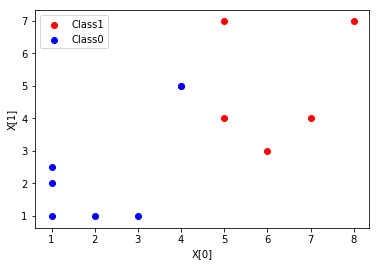

In [120]:
plt.scatter((X[y[:,0]==1])[:,0], (X[y[:,0]==1])[:,1], color="red", label="Class1")
plt.scatter((X[y[:,0]==0])[:,0], (X[y[:,0]==0])[:,1], color="blue", label="Class0")
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.legend()
plt.show()

### Hypothesis function

$$\widehat{y} = g(w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + ........ + w_{m}x_{m})$$

$g(z) = \frac{1}{1 + e^{-z}}$

$g(z)\ is\ known\ as\ the\ Sigmoid\ Function$

$\widehat{y} = The\ output\ predicted\ by\ our\ model$

$m = Number\ of\ features$

$w_{0}$
,
$w_{1}$
.....
$w_{m}$
$= The\ coefficients\ of\ the\ features\ ,also\ known\ as\ weights.\ (We\ need\ to\ adjust\ the\ values\ of\ these\ coefficients)$

$x_{1}$
,
$x_{2}$
.....
$x_{m}$
$= The\ input\ feature\ value$

$x_{0} = Bias\ term\ (Usually\ equal\ to\ 1)$

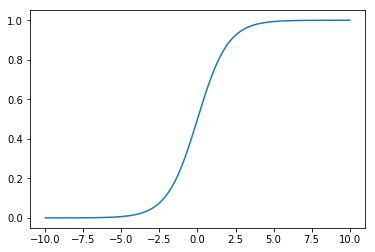

In [121]:
_x = np.linspace(-10,10,1000)
_y = 1.0/(1 + np.exp(-_x))
plt.plot(_x,_y)
plt.show()

### Cost function : Log loss

$For\ Binary\ Classification$

$$J(W) = - \frac{1}{n}\sum_{i=1}^{n}(\  y_{i}\log(\widehat {y_{i}} + \epsilon) \  + (1-y_{i})\log(1-\widehat {y_{i}} + \epsilon) \ )$$

$J(W) = Cost\ Function$

$n = Number\ of\ data\ points$

$y_{i} = Actual\ output$

$\widehat{y_{i}} = Predicted\ output$

$W = Weights\ vector$

$\epsilon = A\ small\ number\ to\ prevent\ overflow\ at\ the\ extremeties$

### Optimization : Gradient Descent

$One\ step\ of\ Gradient\ Descent\ is\ :\ $

$For\ all\ weights\ j : $

$$w_{j} = w_{j} -  \alpha \frac{\partial }{\partial w_{j}} J(W)$$

$\alpha = Learning\ rate$

$\frac{\partial }{\partial w_{j}} J(W)\ \ \ = \ \ \ Partial\ derivative\ of\ loss\ function\ \ w.r.t\ \ w_{j} \ \ \ = \ \ \ \ \frac{1}{n}\sum_{i=1}^{n}(\widehat{y_{i}}-y_{i})x_{j}^{(i)}$ 

$\therefore For\ all\ weights\ j : $

$$w_{j} = w_{j} -  \alpha \frac{1}{n}\sum_{i=1}^{n}(\widehat{y_{i}}-y_{i})x_{j}^{(i)}$$

In [122]:
X.shape

(12, 2)

In [123]:
y.shape

(12, 1)

In [124]:
X = np.hstack( (np.ones((n,1)).reshape(n,1) , X) )

In [125]:
X.shape

(12, 3)

In [126]:
y.shape

(12, 1)

In [127]:
W = np.random.randn(3,1)

In [128]:
W

array([[ 1.3315865 ],
       [ 0.71527897],
       [-1.54540029]])

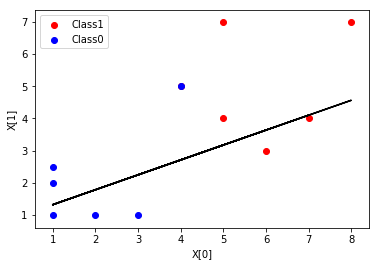

In [129]:
#ploting decison boundary
_X = X[:,1]
_y = (- W[0,:] - W[1,:] * _X)/(W[2,:])
plt.plot(_X, _y, color="black")
plt.scatter((X[y[:,0]==1])[:,1], (X[y[:,0]==1])[:,2], color="red", label="Class1")
plt.scatter((X[y[:,0]==0])[:,1], (X[y[:,0]==0])[:,2], color="blue", label="Class0")
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.legend()
plt.show()

In [130]:
def sigmoid(X):
    return 1.0/(1 + np.exp(-X))

In [164]:
sigmoid(np.array([[1,2,3]])).shape

(1, 3)

In [131]:
def predict(X, W):
    return sigmoid(np.dot(X,W))

In [132]:
y_hat = predict(X,W)

In [133]:
X.shape

(12, 3)

In [134]:
W.shape

(3, 1)

In [135]:
y_hat

array([[ 0.62280359],
       [ 0.02835192],
       [ 0.21863823],
       [ 0.72850672],
       [ 0.26039143],
       [ 0.53915421],
       [ 0.77149007],
       [ 0.13983811],
       [ 0.02266553],
       [ 0.87347318],
       [ 0.00270533],
       [ 0.02835192]])

In [136]:
def cost_function(y_hat, y, eps=1e-8):
    ret = -( np.sum( y * np.log(y_hat + eps) + (1-y) * np.log(1 - y_hat + eps) ))/n
    return ret


In [137]:
cost = cost_function(y_hat, y)

In [138]:
print cost

1.72640340512


In [139]:
def gradient_descent(W, y_hat, y, X, alpha=0.01):
    W_new = W - alpha * (1.0/n) * np.dot(np.transpose(X),(y_hat - y))
    return W_new

In [140]:
W

array([[ 1.3315865 ],
       [ 0.71527897],
       [-1.54540029]])

In [141]:
W_new = W

In [142]:

W_new = gradient_descent(W_new, y_hat, y, X)

In [143]:
y_hat = predict(X, W_new)
cost_function(y_hat, y)

1.6677893005308639

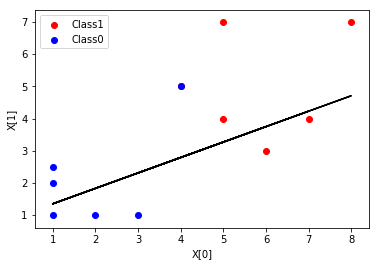

In [144]:
_X = X[:,1]
_y = (- W_new[0,:] - W_new[1,:] * _X)/(W_new[2,:])
plt.plot(_X, _y, color="black")
plt.scatter((X[y[:,0]==1])[:,1], (X[y[:,0]==1])[:,2], color="red", label="Class1")
plt.scatter((X[y[:,0]==0])[:,1], (X[y[:,0]==0])[:,2], color="blue", label="Class0")
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.legend()
plt.show()

In [145]:
def binary_logistic_regression(X, y, iterations=1000, alpha=0.01, verbose=True, eps=1e-5, plot=True):
    n_samples = X.shape[0]
    n_features = X.shape[1]
    costs = []
    W = np.random.randn(n_features,1)
    if(verbose):
        print "Initial Weights :"
        print W
    for i in range(iterations):
        y_hat = sigmoid(np.dot(X,W))
        cost = -( np.sum( y * np.log(y_hat + eps) + (1-y) * np.log(1 - y_hat + eps) ))/n_samples
        costs.append(cost)
        W = W - alpha * (1.0/n_samples) * np.dot(np.transpose(X),(y_hat - y))
    if(verbose):
        print "Final weights : "
        print W
        print "Final cost : ", costs[iterations-1]
    y_hat = np.dot(X,W)
    
    #ploting cost and resultant graphs 
    if(plot==True):
        f, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))
        ax1.plot(range(iterations), costs)
        ax1.set_xlabel("Iterations")
        ax1.set_ylabel("Cost")
        if(n_features==3):
            ax2.set_ylim([min(X[:,2])-2,max(X[:,2])+2])
            _X = X[:,1]
            _y = (- W[0,:] - W[1,:] * _X)/(W[2,:])
            ax2.plot(_X, _y, color="black")
            ax2.scatter((X[y[:,0]==1])[:,1], (X[y[:,0]==1])[:,2], color="red", label="Class1")
            ax2.scatter((X[y[:,0]==0])[:,1], (X[y[:,0]==0])[:,2], color="blue", label="Class0")
            ax2.set_xlabel("X[0]")
            ax2.set_ylabel("X[1]")
        plt.legend()
        plt.show()

    
    return W

Initial Weights :
[[-0.00838385]
 [ 0.62133597]
 [-0.72008556]]
Final weights : 
[[-3.80859915]
 [ 0.93485298]
 [ 0.13407082]]
Final cost :  0.226041504842


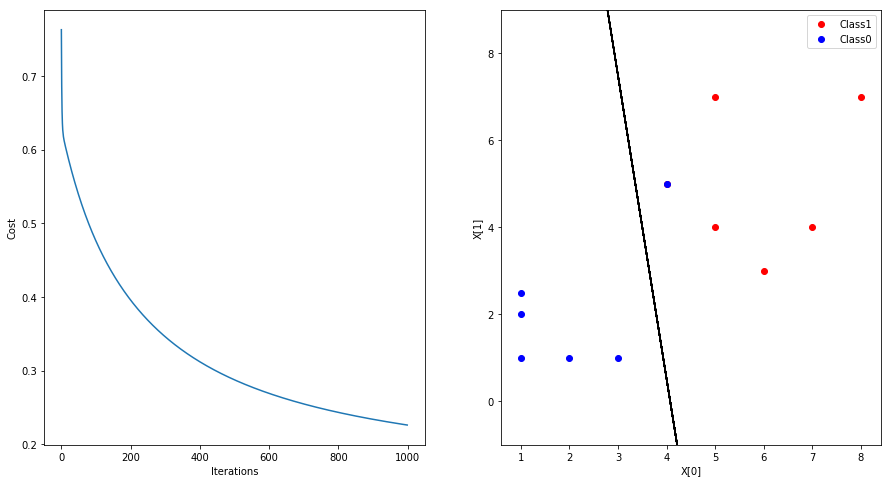

In [146]:
W = binary_logistic_regression(X, y, iterations=1000, alpha=0.05)

In [149]:
predict(X[2,:] ,W)

array([ 0.80249299])

### Multiclass Classification : One-Vs-All Method

In [98]:
X = np.array([ [1,1] , [2,1] , [1,3] , [2,2] , [4,3] , [5,6] , [4,5] , [5,5] , [1,9] , [1,10]  , [2,8] , [2,10] ])
y = np.array([1 , 1 , 1 , 1 , 2 , 2 , 2 , 2 , 0 , 0 , 0 , 0])


In [99]:
n = X.shape[0]
print n

12


In [100]:
y = y.reshape((n,1))

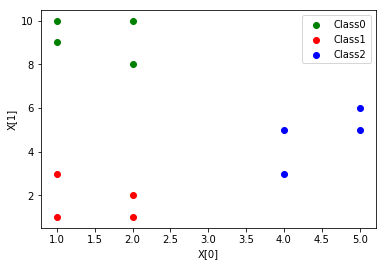

In [101]:
plt.scatter((X[y[:,0]==0])[:,0], (X[y[:,0]==0])[:,1], color="green", label="Class0")
plt.scatter((X[y[:,0]==1])[:,0], (X[y[:,0]==1])[:,1], color="red", label="Class1")
plt.scatter((X[y[:,0]==2])[:,0], (X[y[:,0]==2])[:,1], color="blue", label="Class2")
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.legend()
plt.show()

In [102]:
X = np.hstack( (np.ones((n,1)).reshape(n,1) , X) )

Initial Weights :
[[-0.17460021]
 [ 0.43302619]
 [ 1.20303737]]
Final weights : 
[[ 9.27644073]
 [-2.02537024]
 [-1.35212528]]
Final cost :  0.017725373952


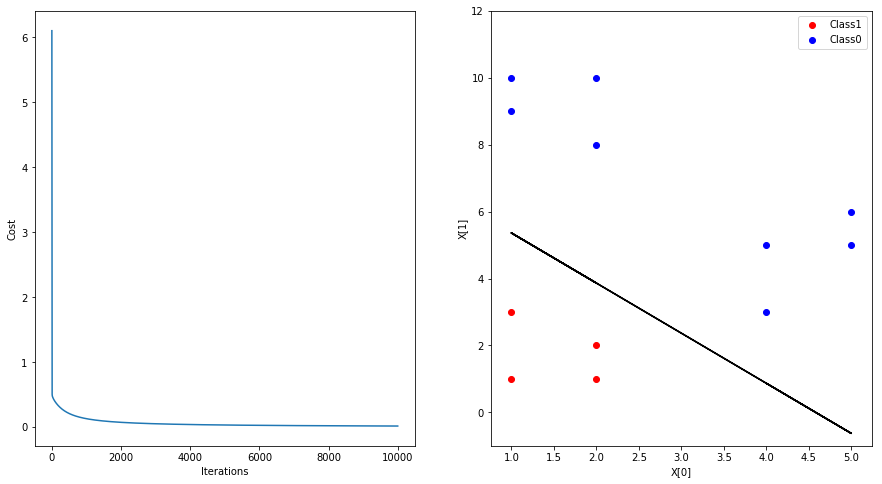

In [103]:
y_1 = np.array(map(lambda x : int(x==1), y)).reshape((n,1))
W_for_1 = binary_logistic_regression(X, y_1, alpha=0.05, iterations=10000)

Initial Weights :
[[-0.96506567]
 [ 1.02827408]
 [ 0.22863013]]
Final weights : 
[[-9.21713077]
 [ 3.43276248]
 [-0.2846945 ]]
Final cost :  0.0178433198426


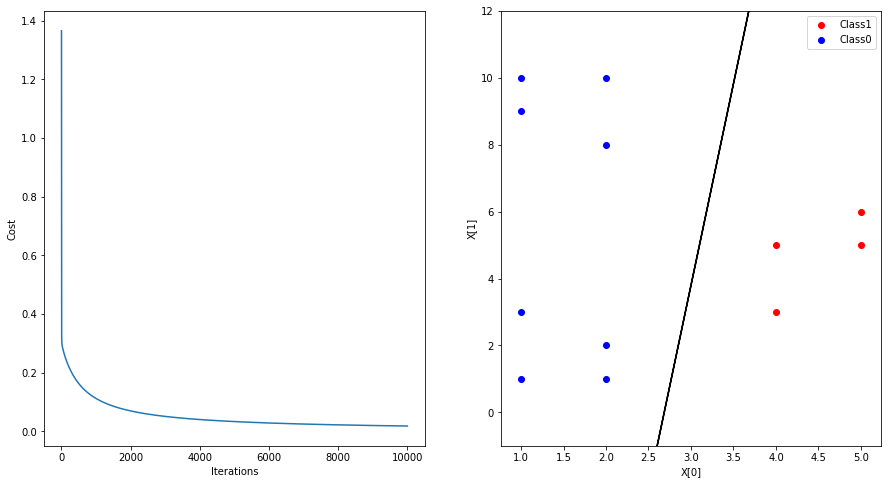

In [104]:
y_2 = np.array(map(lambda x : int(x==2), y)).reshape((n,1))
W_for_2 = binary_logistic_regression(X, y_2, alpha=0.05, iterations=10000)

Initial Weights :
[[ 0.44513761]
 [-1.13660221]
 [ 0.13513688]]
Final weights : 
[[-4.69581535]
 [-4.112919  ]
 [ 2.06493187]]
Final cost :  0.00828893260307


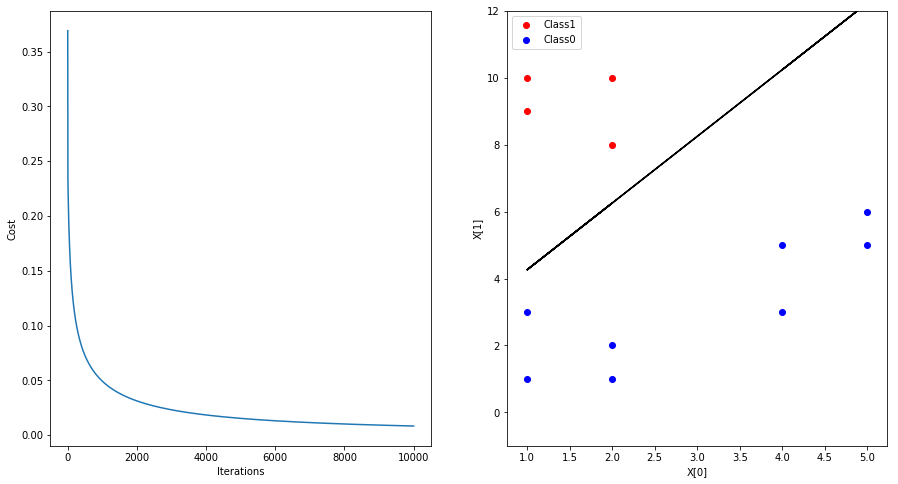

In [105]:
y_0 = np.array(map(lambda x : int(x==0), y)).reshape((n,1))
W_for_0 = binary_logistic_regression(X, y_0, alpha=0.05, iterations=10000)

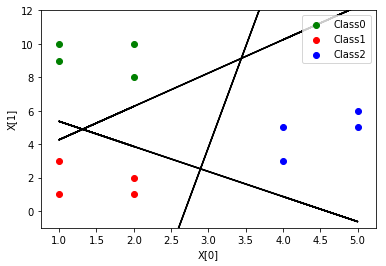

In [106]:
axes = plt.gca()
axes.set_ylim([min(X[:,2])-2,max(X[:,2])+2])
_X = X[:,1]
_y = (- W_for_1[0,:] - W_for_1[1,:] * _X)/(W_for_1[2,:])
plt.plot(_X, _y, color="black")
_y = (- W_for_2[0,:] - W_for_2[1,:] * _X)/(W_for_2[2,:])
plt.plot(_X, _y, color="black")
_y = (- W_for_0[0,:] - W_for_0[1,:] * _X)/(W_for_0[2,:])
plt.plot(_X, _y, color="black")
plt.scatter((X[y[:,0]==0])[:,1], (X[y[:,0]==0])[:,2], color="green", label="Class0")
plt.scatter((X[y[:,0]==1])[:,1], (X[y[:,0]==1])[:,2], color="red", label="Class1")
plt.scatter((X[y[:,0]==2])[:,1], (X[y[:,0]==2])[:,2], color="blue", label="Class2")

plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.legend()
plt.show()

### Multiclass prediction : Softmax Function

$$\sigma (z)_{j} = \frac{e^{z_{j}}}{ \sum_{i = 1}^{k} e^{z_{i}} }\ \ \ \ , j \in [1,K]$$

$K = Number\ of\ classes$

In [310]:
def softmax(x, ax=0):
    exp_sum = np.sum(np.exp(x), axis=ax, keepdims=True)
    return np.exp(x)/exp_sum
    

In [311]:
test_point = np.array([ [1, 2.5, 4.5] ])
pred_0 = predict(test_point, W_for_0)
pred_1 = predict(test_point, W_for_1)
pred_2 = predict(test_point, W_for_2)

In [312]:
pred_2.ravel()

array([ 0.12826916])

In [313]:
pred_0.shape

(1, 1)

In [314]:
softmax(np.array([1,2,3,4,1,2,3], dtype=float))

array([ 0.02364054,  0.06426166,  0.1746813 ,  0.474833  ,  0.02364054,
        0.06426166,  0.1746813 ])

In [315]:
softmax(np.array([pred_0[0,0], pred_1[0,0], pred_2[0,0]]))

array([ 0.30563962,  0.34806436,  0.34629601])

In [316]:
W_for_0.shape

(3, 1)

In [249]:
weights_per_class = np.array([W_for_0.ravel() , W_for_1.ravel() , W_for_2.ravel()])

In [317]:
def multiclass_prediction(test_points , weights_per_class):
    preds = sigmoid(np.dot(test_points , np.transpose(weights_per_class)))
    print test_points.shape
    print weights_per_class.shape
    print np.dot(test_points , np.transpose(weights_per_class)).shape
    print preds
    probabilities = softmax(preds, ax=1)
    print probabilities
    print np.sum(probabilities, axis=1)
    return np.argmax(probabilities, axis=1)


In [318]:
multiclass_prediction(np.array([ [1, 2.5, 4.5] , [1, 3.5, 6] ]), weights_per_class)

(2, 3)
(3, 3)
(2, 3)
[[ 0.00338194  0.13336264  0.12826916]
 [ 0.00122763  0.0026644   0.74826324]]
[[ 0.30563962  0.34806436  0.34629601]
 [ 0.24318052  0.24353017  0.51328932]]
[ 1.  1.]


array([1, 2])

In [116]:
def multiclass_logistic_regression(X, y, n_class, iterations=10000, alpha=0.05, verbose=True, eps=1e-5, plot=True):
    n_samples = X.shape[0]
    n_features = X.shape[1]
    weights_per_class = np.empty(shape=(n_class,n_features))
    
    for i in range(n_class):
        _y = np.array(map(lambda x : int(x==i), y)).reshape((n,1))
        _W = binary_logistic_regression(X, _y, alpha=alpha, iterations=iterations, verbose=False, plot=False)
        weights_per_class[i] = _W.reshape((1,-1))
    if(plot and n_features==3):
        colors = ["r" , "g" , "b", "c", "m" , "k" , "w" , "y"]
        axes = plt.gca()
        axes.set_ylim([min(X[:,2])-2,max(X[:,2])+2])
        _X = X[:,1]
        for i in range(n_class):
            _y = (- weights_per_class[i,0] - weights_per_class[i,1] * _X)/(weights_per_class[i,2])
            plt.plot(_X, _y, color="black")
        for i in range(n_class):
            plt.scatter((X[y[:,0]==i])[:,1], (X[y[:,0]==i])[:,2], color=colors[i%8], label="Class"+str(i))
        plt.xlabel("X[0]")
        plt.ylabel("X[1]")
        plt.legend()
        plt.show()
    return weights_per_class
        

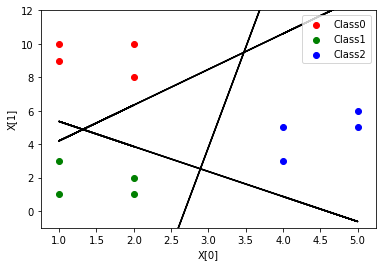

array([[-4.40306367, -4.54808962,  2.1304726 ],
       [ 9.22000437, -2.01182623, -1.34557914],
       [-9.13018144,  3.40451783, -0.28508427]])

In [117]:
multiclass_logistic_regression(X, y, 3)